<a href="https://colab.research.google.com/github/aishuse/knn_svm_naive/blob/main/KNN_Social_network_ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Datasets/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.replace({'Male':0,'Female':1}, inplace=True)

In [ ]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
#seperate i/p & o/p

x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [ ]:
x

array([[    0,    19, 19000],
       [    0,    35, 20000],
       [    1,    26, 43000],
       ...,
       [    1,    50, 20000],
       [    0,    36, 33000],
       [    1,    49, 36000]])

In [ ]:
#seperate train & test data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [ ]:
x_train.shape

(320, 3)

In [ ]:
# find value of k.
# method 1: sqrt of training set

k = np.sqrt(x_train.shape[0])
k = int(np.floor(k))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [ ]:
#prediction

y_pred = knn.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(accuracy_score(y_pred,y_test))


0.9375


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        52
           1       0.90      0.93      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[49  3]
 [ 2 26]]


In [ ]:
accuracy = []

for i in range(1,17):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  print(accuracy_score(y_pred,y_test))

  acc = accuracy_score(y_pred,y_test)
  accuracy.append(acc)
print('...................')
accuracy

0.8875
0.8375
0.9125
0.9125
0.925
0.925
0.925
0.9375
0.9375
0.9375
0.9375
0.9375
0.9375
0.9375
0.9375
0.9375
...................


[0.8875,
 0.8375,
 0.9125,
 0.9125,
 0.925,
 0.925,
 0.925,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375]

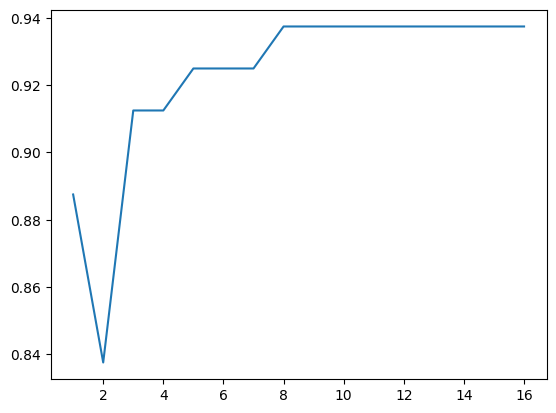

In [ ]:
plt.plot(range(1,17), accuracy)

In [ ]:
# take i/p from user and test

def predict_output():
  gender = input('enter ur gender:')
  age = int(input("enter ur age"))
  salary = int(input('enter salary'))

  if gender in ['MALE','Male','male']:
    gender = 0
  else:
    gender= 1

  tst =  np.array([[gender],[age],[salary]]).reshape(1,3)
  tst_scalar = scalar.transform(tst)
  return knn.predict(tst_scalar)

predict_output()

enter ur gender:male
enter ur age11
enter salary11111111


array([1])